<a href="https://colab.research.google.com/github/Kate5-7-2021/INFO-5502-SU2021/blob/main/INFO_5502_Assign_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 10: Central Limit Theorem**

In [13]:
 #Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw10.ok')

In [14]:
import pandas as pd

In [15]:
#df = pd.read_csv (r'/content/restaurant_inspection_scores.txt')
df = pd.read_csv (r'/content/restaurant_inspection_scores.csv')
df

,Restaurant Name,Zip Code,Inspection Date,Score,Address,Facility ID,Process Description
0,6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
1,6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
2,6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
3,6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
4,6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD\nAUSTIN, TX 78652\n",2803436,Routine Inspection
...,...,...,...,...,...,...,...
24362,Yogurt Planet,78758,02/23/2016,97,"3220 FEATHERGRASS CT\nAUSTIN, TX 78758\n(30.39...",10363369,Routine Inspection
24363,Zavala Elementary,78702,09/02/2015,97,"310 ROBERT T MARTINEZ JR ST\nAUSTIN, TX 78702\...",2800300,Routine Inspection
24364,"Yogurt Planet, LLC",78751,08/24/2015,100,"4601 N LAMAR BLVD Bunit 502\nAUSTIN, TX 78751\...",10197585,Routine Inspection
24365,Zen Restaurant,78705,02/01/2016,87,"3423 GUADALUPE ST\nAUSTIN, TX 78705\n(30.30109...",2802179,Routine Inspection


In [16]:
#df_united = pd.read_csv (r'/content/united_summer2015.txt')
df_united = pd.read_csv (r'/content/united_summer2015.csv')
df_united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


In [17]:
#df.to_csv (r'/content/restaurant_inspection_scores.csv', index=None)

In [18]:
#df_united.to_csv (r'/content/united_summer2015.csv', index=None)

##**1. The Bootstrap and The Normal Curve**

In this exercise, we will explore a dataset that includes the safety inspection scores for restaurants in the city of Austin, Texas. We will be interested in determining the average restaurant score for the city from a random sample of the scores; the average restaurant score is out of 100. We'll compare two methods for computing a confidence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.

In [19]:
# Just run this cell.
pop_restaurants = Table.read_table('/content/restaurant_inspection_scores.csv').drop('Facility ID','Process Description')
pop_restaurants


Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


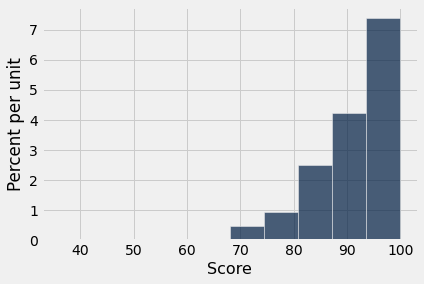

In [20]:
#plot a histogram of the scores from pop_restaurants
pop_restaurants.hist('Score')

In [21]:
#population mean
pop_mean = np.mean(pop_restaurants.column('Score'))
pop_mean

91.40706693478886

In [22]:
#random sample of 100 restaurant inspections, called restaurant_sample
#using this sample to estimate the population mean
restaurant_sample = pop_restaurants.sample(100, with_replacement=False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Popeye's Chicken and Biscuits,78745,02/24/2015,97,"111 W WILLIAM CANNON DR AUSTIN, TX 78745 (30.193122, -97 ..."
"Floyd's Coffee, Market, Cafe",78704,08/28/2014,82,"301 S CONGRESS AVE Unit 105 AUSTIN, TX 78704 (30.259037, ..."
Dragon Mart,78705,06/29/2016,91,"3201 N LAMAR BLVD AUSTIN, TX 78705 (30.301701, -97.74533)"
JR's Tacos,78758,04/29/2015,97,"1921 CEDAR BEND DR Bldg C AUSTIN, TX 78758 (30.408523, - ..."
Americas Best Value Inn - South Austin,78741,12/22/2015,97,"2915 S IH 35 SVRD NB AUSTIN, TX 78741 (30.227177, -97.74 ..."
Austin's Pizza #23,78731,09/06/2016,91,"3637 FAR WEST BLVD AUSTIN, TX 78731 (30.354762, -97.756107)"
Dunkin Donuts,78748,09/30/2016,98,"401 W SLAUGHTER LN AUSTIN, TX 78748 (30.169511, -97.796192)"
Lake Travis High School,78738,08/26/2014,100,"3322 S FM 620 RD LAKEWAY, TX 78738 (30.327505, -97.964304)"
Open Door Preschool-East,78722,06/29/2016,93,"3804 CHERRYWOOD RD AUSTIN, TX 78722 (30.291414, -97.713805)"
Little China Restaurant,78758,03/12/2014,96,"1921 CEDAR BEND DR Bunit 101 AUSTIN, TX 78758 (30.408523 ..."


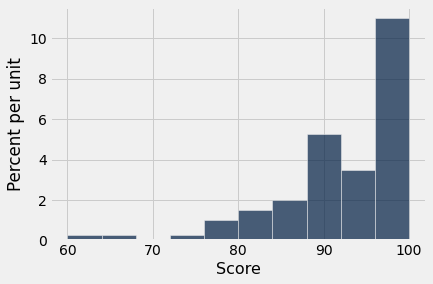

In [23]:
#plot a histogram of the sample scores from restaurant_sample
restaurant_sample.hist('Score')

In [24]:
#sample mean
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_mean

91.98

###**1.1 Question 1**

Complete the function one_resampled_mean below. It should take in an original table data, with a column Score, and return the mean score of one resampling from data.

Remember to call your function and check the output before moving on to autograder tests.

In [25]:
def one_resampled_mean(data):
    resampled_data=data.select('Score').sample().column(0)
    return np.mean(resampled_data)
this_mean=one_resampled_mean(restaurant_sample)
this_mean

92.58

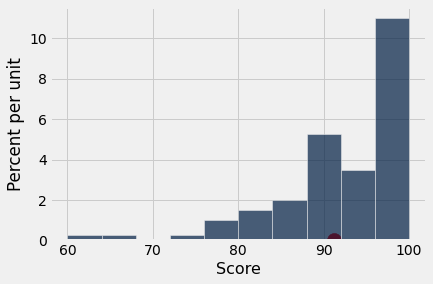

In [26]:
import matplotlib.pyplot as plots
restaurant_sample.select('Score',).hist(bins=10)
observed_statistic = 91.26 
plots.scatter(observed_statistic, 0, color='red', s=200)

###**1.2 Question 2**
Complete the function bootstrap_scores below. It should take no arguments. It should simulate drawing 5000 resamples from restaurant_sample and compute the mean restaurant score in each resample. It should return an array of those 5000 resample means.

In [27]:
def bootstrap_scores():
    #main_sample=restaurant_sample.select('Score')
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean =np.mean(restaurant_sample.select('Score').sample().column(0))
        resampled_means =np.append(resampled_means,resampled_mean)
    return resampled_means

resampled_means = bootstrap_scores()
resampled_means

array([92.51, 91.38, 90.83, ..., 93.54, 91.93, 92.51])

###**1.3 Question 3**
Compute a 95 percent confidence interval for the average restaurant score using the array resampled_means.

In [28]:

lower_bound = percentile(2.5, resampled_means)
upper_bound = percentile(97.5, resampled_means)
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound, ",", upper_bound, ")")

95% confidence interval for the average restaurant score, computed by bootstrapping:
( 90.45 , 93.45 )


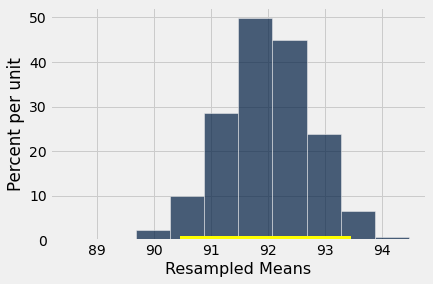

In [29]:
#histogram of the resampled means
Table().with_column('Resampled Means', resampled_means).hist()
#plots.scatter(lower_bound, 0, color='red', s=100)
#plots.scatter(upper_bound, 0, color='red', s=100)
plots.plot(make_array(lower_bound, upper_bound), make_array(0, 0), color='yellow', lw=8)


###**1.4 Question 4**
What distribution is the histogram between question 2 and 3 displaying (that is, what data are plotted), and why does it have that shape?

The data that are plotted are the mean of all resampling that are the outcome of the bootstrapping the sample and then based on the 95% confidence interval the yellow line indicate the range between the lower bond and upper bond of the confidence interval.The histogram is very close to the normal distribution shape which means almost all the sample can represent the main dataset.

###**1.5 Question 5**

Does the distribution of the sampled scores look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

Hint: Remember that we are no longer talking about the resampled means!



For the last question, you'll need to recall two facts.

If a group of numbers has a normal distribution, around 95% of them lie within 2 standard deviations of their mean.

The Central Limit Theorem tells us the quantitative relationship between the following:

the standard deviation of an array of numbers.

the standard deviation of an array of means of samples taken from those numbers.

Also recall the standard deviation of sample means:

$\texttt{sd of sample means from many samples from a distribution}  =   $$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ $


I think 'yes', but it is not the completely symmetric.It is approximately follows the normal distribution, because the shape of the histogram is very close to the normal distribution and it shows that in the range of the 95% confidence interval with consideration of the 2 standard diviation the distribution is almost symmetric. Also, when we consider the sd of the sample mean and the confidence interval around that they prove the claim of having almost normal distribution.

###**1.6 Question 6**
Without referencing the array resampled_means or performing any new simulations, calculate an interval around the sample_mean that covers approximately 95% of the numbers in the resampled_means array. You may use the following values to compute your result, but you should not perform additional resampling - think about how you can use the CLT to accomplish this.

In [30]:
np.std(pop_restaurants.column('Score'))

7.669083646194807

In [31]:
import math
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_sd = np.std(restaurant_sample.column('Score'))
sample_size = restaurant_sample.num_rows
pop_sd=np.std(pop_restaurants.column('Score'))

sd_of_means = pop_sd/math.sqrt(sample_size)
sd_of_means

0.7669083646194806

In [32]:
lower_bound_normal =np.mean(restaurant_sample.column('Score')) - (2*sd_of_means) 
upper_bound_normal = np.mean(restaurant_sample.column('Score')) + (2*sd_of_means)
print("95% confidence interval for the average restaurant score, computed by a normal approximation:\n(",lower_bound_normal, ",", upper_bound_normal, ")")

95% confidence interval for the average restaurant score, computed by a normal approximation:
( 90.44618327076104 , 93.51381672923897 )


This confidence interval should look very similar to the one you computed in Question 3.

##**2. Testing the Central Limit Theorem**

To recap the properties we just saw: The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by

$$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$

In other words, suppose we start with any distribution that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

###**2.1 Question 1**. 

Define the function one_statistic_prop_heads which should return exactly one simulated statistic of the proportion of heads from $n$ coin flips.

In [33]:
coin_proportions = make_array('Heads', 'Tails') # our coin is fair

def one_statistic_prop_heads(n):
    simulated_proportions = np.random.choice(coin_proportions, 100)
    prop_heads = np.count_nonzero(simulated_proportions == 'Heads')
    return prop_heads
one_statistic_prop_heads(100)

49

###**2.2 Question 2.**

The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large? How about 50? The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say Heads is $1$ and Tails is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which definitely doesn't match our definition of a normal distribution. The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses (which is equivalent to the mean value of the coin tosses), so the CLT should hold true if we compute the sample proportion of heads many times.

Write a function called sample_size_n that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [34]:
def sample_size_n(n):
    coin_proportions = make_array('Heads', 'Tails') # our coin is fair
    heads_proportions = make_array()
    for i in np.arange(5000):
        prop_heads = np.count_nonzero(np.random.choice(coin_proportions, 100) == 'Heads')
        heads_proportions =np.append(heads_proportions,prop_heads )
    return heads_proportions
#heads_proportions

sample_size_n(100)


array([46., 46., 58., ..., 51., 42., 50.])

Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported the flight delay data and computed its standard deviation for you.

In [35]:
united = Table.read_table('/content/united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

###**2.3 Question 3** 

Write a function called empirical_sample_mean_sd that takes a sample size n as its argument. The function should simulate 500 samples with replacement of size n from the flight delays dataset, and it should return the standard deviation of the means of those 500 samples.


In [36]:
def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(100, with_replacement=False)
        sample_mean = np.mean(sample.select('Delay').sample().column(0))
        sample_means = np.append(sample_means,sample_mean)
    return np.std(sample_means)

empirical_sample_mean_sd(100)
                         

5.363279634701141

##**2.4	Question 4**

Now, write a function called predict sample mean sd to find the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard deviation of the mean delay time for samples of size n from the flight delays (represented in the table united). 


In [40]:
def predict_sample_mean_sd(n):   
   sd_of_means = united_std/math.sqrt(n)
   return sd_of_means   
predict_sample_mean_sd(10)

12.484735400972708

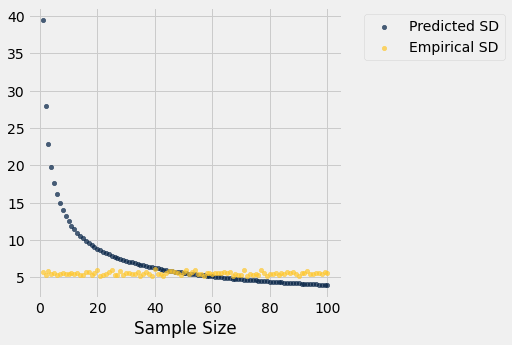

In [12]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sample_mean_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sample_mean_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')